### Random Forest

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import accuracy_score as acs

In [4]:
hdb_model_data = pd.read_csv("hdb_model_data_regression.csv")
hdb_model_data.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,5,73.0,7314,26436.0,667,908.970521,9026.295266,1,3619.754795
1,20,70.0,7314,26436.0,1100,687.185319,9015.122154,1,6695.082857
2,2,73.0,7314,26436.0,676,586.980690,8949.443986,1,3141.673973
3,5,73.0,7314,26436.0,663,800.631299,9123.690385,1,3824.646575
4,8,68.0,7314,26436.0,708,927.322849,9734.443856,1,3226.041176


In [5]:
hdb_model_data.shape

(77834, 9)

In [6]:
X = hdb_model_data.iloc[:,0:8]
y= hdb_model_data.iloc[:,-1]  

X

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate
0,5,73.0,7314,26436.0,667,908.970521,9026.295266,1
1,20,70.0,7314,26436.0,1100,687.185319,9015.122154,1
2,2,73.0,7314,26436.0,676,586.980690,8949.443986,1
3,5,73.0,7314,26436.0,663,800.631299,9123.690385,1
4,8,68.0,7314,26436.0,708,927.322849,9734.443856,1
...,...,...,...,...,...,...,...,...
77829,8,146.0,20064,30370.0,780,1182.415251,15623.766720,0
77830,8,142.0,20064,30370.0,766,661.035324,15234.077610,0
77831,8,142.0,20064,30370.0,766,661.035324,15234.077610,0
77832,11,146.0,20064,30370.0,768,573.471701,15246.853760,0


https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regressor = RandomForestRegressor(n_estimators = 8,  #no. of trees to be used in the model
                        max_depth = 15,  # maximum number of splits each tree can take. Too low the model will be trained less and have high bias
                        min_samples_split = 2, #every node have 2 subnodes
                        max_features = 6)#maximum features in each tree
                       
regressor.fit(X_train,y_train)


y_pred_train = regressor.predict(X_train)  
y_pred_test = regressor.predict(X_test)  
mse = mean_squared_error(y_test,y_pred_test)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, y_pred_test).round(2))
print("Mean Squared Error: "+ str(mse))
rmse = math.sqrt(mse)  
print("Root Mean Squared Error: ", rmse)
adj_r2 = 1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: ", adj_r2)

# msle
msle = metrics.mean_squared_log_error(y_test, y_pred_test)
print("Mean Squared Log Error: ", msle)

Coefficient of determination test(R2): 0.94
Mean Squared Error: 133778.73049477598
Root Mean Squared Error:  365.75774837284854
Adjusted R2:  0.9370001933456799
Mean Squared Log Error:  0.004722247268909588


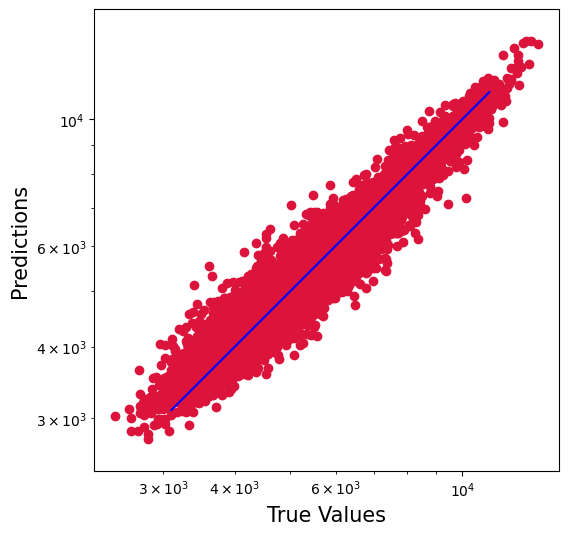

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test[0:50]), max(y_test[0:50]))
p2 = min(min(y_pred_test[0:50]), min(y_test[0:50]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()